# Machine Learning Models for stock prediction - non transformation version

# Import necessary libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

## Import data

The data was downloaded from Bloomberg on:
* Exchange rate of Vietnam with its major trading partners: the China and the US
* Precious metal spot price and future price: Gold, Silver, Palladium, Platinum
* Global Stock Indices: Hang Seng Index, Nasdaq 100, Nasdaq Composite, Nikkei 225, SP500, DOJI, Shanghai Shenzhen CSI3000, Shanghai Shenzhen Composite and Singapore Stock Index
* Volatility stock index: VIX Index

The data will be imported from previous EDA session, which has been cleaned.

In [58]:
# Import data
data = pd.read_csv('index_vni_technical.csv')

# Transfer date column to date time
import datetime
data['Date'] = pd.to_datetime(data['Date'], format = '%m/%d/%Y')

# Turn date into index
data.set_index('Date', inplace = True)

In [59]:
data.head()

,Close,Open,Low,High,Volume
Date,,,,,
2023-06-30,1120.18,1125.39,1120.01,1126.33,617526000
2023-06-29,1125.39,1139.42,1125.39,1140.43,906890000
2023-06-28,1138.35,1134.33,1131.86,1140.56,892136000
2023-06-27,1134.33,1132.03,1128.82,1136.49,721995000
2023-06-26,1132.03,1129.38,1119.95,1134.00,1040389000


# Feature Extraction

We will generate the following set of features:
- Price statistics (High-Low, Open-Close, price and volume difference)
- Simple Moving Average
- Exponential Moving Average

In [62]:
# Reversed the data so we calculate the data backward
data = data[::-1]

## Generate features

In [64]:
## Generate simple price features

# Price indicators
data['H-L'] = data['High'] - data['Low'] 
data['O-C'] = data['Close'] - data['Open'] 

# Moving Average
data['3_sma'] = data['Close'].rolling(3).mean()
data['7_sma'] = data['Close'].rolling(7).mean()
data['10_sma'] = data['Close'].rolling(window = 10).mean() 
data['14_sma'] = data['Close'].rolling(14).mean()
data['21_sma'] = data['Close'].rolling(21).mean()
data['30_sma'] = data['Close'].rolling(window = 30).mean()

# Stock volatility
data['5_std']= data['Close'].rolling(5).std() 
data['7_std'] = data['Close'].rolling(7).std()
data['14_std'] = data['Close'].rolling(14).std()

# Volume volatility
data['vol_diff'] = data['Volume'] - data['Volume'].shift(periods = 1)

# Alternative technical indicators
data['Low_diff'] = data['Low'] - data['Low'].shift(periods = 1)
data['High_diff'] = data['High'] - data['High'].shift(periods = 1)
data['Close_diff'] = data['Close'] - data['Close'].shift(periods = 1)
data['Vol_diff'] = data['Volume'] - data['Volume'].shift(periods = 1)
data['Range_diff'] = data['H-L'] - data['H-L'].shift(periods = 1)

In [65]:
## Define 50 days EMA and SMA
# Calculate the SMA
data['50_sma'] = data['Close'].rolling(50).mean()

# Calculate the EMA
data['50_ema'] = data['Close'].ewm(span = 50, adjust = False).mean()

In [66]:
## Define 100 days EMA and SMA
data['100_sma'] = data['Close'].rolling(100).mean()
data['100_ema'] = data['Close'].ewm(span = 100, adjust = False).mean()

### Check the features

In [19]:
# Describe statistics
data.describe()

,Close,Open,Low,High,Volume,H-L,O-C,3_sma,7_sma,10_sma,...,vol_diff,Low_diff,High_diff,Close_diff,Vol_diff,Range_diff,50_sma,50_ema,100_sma,100_ema
count,4085.000000,4085.000000,4085.000000,4085.000000,4.085000e+03,4085.000000,4085.000000,4082.000000,4079.000000,4075.000000,...,4.084000e+03,4084.000000,4084.000000,4084.000000,4.084000e+03,4084.000000,4036.000000,4085.000000,3986.000000,4085.000000
mean,743.764605,743.869133,738.685643,748.697679,2.046574e+08,10.012037,-0.104529,743.511108,743.239617,742.900757,...,-1.490967e+05,-0.011131,-0.012679,-0.011173,-1.490967e+05,-0.001548,739.463573,744.009189,735.545547,744.576185
std,304.823521,304.985494,302.508678,306.804391,2.482349e+08,8.436671,8.993807,304.705478,304.496440,304.329357,...,6.625373e+07,11.072833,9.647626,10.551922,6.625373e+07,6.904079,301.945590,301.655372,299.246942,298.202401
min,235.500000,236.570000,234.660000,236.700000,1.340000e+06,0.000000,-68.310000,240.786667,243.034286,243.798000,...,-4.956450e+08,-69.120000,-45.770000,-56.420000,-4.956450e+08,-62.220000,269.943000,284.517761,290.770200,315.007287
25%,491.780000,491.630000,487.670000,495.600000,4.150200e+07,5.020000,-3.650000,491.120833,491.234286,491.107500,...,-1.418650e+07,-4.985000,-4.800000,-4.990000,-1.418650e+07,-2.480000,488.546350,489.722881,490.602775,491.643907
50%,628.800000,628.960000,625.110000,632.250000,1.148790e+08,7.430000,0.130000,628.060000,627.158571,626.887000,...,-1.420000e+05,-0.270000,-0.585000,-0.525000,-1.420000e+05,0.080000,613.356500,622.270648,602.475250,623.544269
75%,982.570000,981.380000,976.730000,985.610000,2.193990e+08,11.870000,4.040000,981.020000,981.058571,981.593000,...,1.346950e+07,4.312500,3.825000,4.215000,1.346950e+07,2.660000,979.358950,981.160374,974.768850,970.702540
max,1528.570000,1534.100000,1524.960000,1536.450000,1.522741e+09,83.750000,58.280000,1526.516667,1515.951429,1510.201000,...,5.755760e+08,73.160000,80.830000,73.230000,5.755760e+08,47.650000,1491.282800,1480.654458,1484.568800,1451.669155


In [68]:
# Exclude missing values
data = data.iloc[100:]

# Machine Learning models - Regression

We will perform the test on several models to determine which models will perform best. The models are:
- Linear Regression (include Ridge and Lasso for avoid multicolinearity)
- Decision Trees Regressor
- Gradient Boosting Regressor
- Random Forest Regressors
- XGBoost Regressor
- Support Vector Regressor

## Train test split - 70% 20% 10%

In [70]:
# Define train test split
def train_test_split(df, target):
    # Define train, cv, test time
    train_time = int(round(len(df) * 0.8))
    
    # Define X, y
    X = df.drop(target, axis = 1)
    y = df[target]
    
    # Train test split
    X_train = X.iloc[:train_time]
    X_test = X.iloc[train_time:]
    
    y_train = y.iloc[:train_time]
    y_test = y.iloc[train_time:]
    
    # Print out to check shape
    print(X_train.shape)
    print(X_test.shape)
    
    print(y_train.shape)
    print(y_test.shape)
    
    return X_train, y_train, X_test, y_test

In [71]:
# Train test split the dataset
X_train, y_train, X_test, y_test = train_test_split(data, 'Close')

(3188, 25)
(797, 25)
(3188,)
(797,)


In [72]:
X_test

,Open,Low,High,Volume,H-L,O-C,3_sma,7_sma,10_sma,14_sma,...,vol_diff,Low_diff,High_diff,Close_diff,Vol_diff,Range_diff,50_sma,50_ema,100_sma,100_ema
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-24,777.28,767.31,778.30,262270000,10.99,-0.62,773.163333,778.800000,776.202,769.642857,...,56475000.0,-1.61,-7.30,2.75,56475000.0,-5.69,797.1226,796.135091,877.6211,850.202541
2020-04-27,780.65,770.77,785.74,307356000,14.97,-9.88,773.780000,777.381429,776.700,771.362857,...,45086000.0,3.46,7.44,-5.89,45086000.0,3.98,793.7890,795.140382,875.6249,848.629619
2020-04-28,773.31,763.66,776.13,219399000,12.47,-6.10,771.546667,774.182857,776.680,772.733571,...,-87957000.0,-7.11,-9.61,-3.56,-87957000.0,-2.50,790.4378,794.045073,873.5895,847.017350
2020-04-29,768.59,768.19,772.62,250081000,4.43,0.52,769.030000,770.488571,775.869,773.360714,...,30682000.0,4.53,-3.51,1.90,30682000.0,-8.04,787.2614,793.067227,871.6875,845.474630
2020-05-04,766.14,761.64,769.73,285570000,8.09,-3.67,766.263333,769.864286,774.046,773.684286,...,35489000.0,-6.55,-2.89,-6.64,35489000.0,3.66,783.9356,791.867336,869.7779,843.830974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,1129.38,1119.95,1134.00,1040389000,14.05,2.65,1128.903333,1119.644286,1119.436,1116.340714,...,133756000.0,-2.67,3.39,2.65,133756000.0,6.06,1076.5954,1087.115717,1065.7380,1077.056386
2023-06-27,1132.03,1128.82,1136.49,721995000,7.67,2.30,1131.913333,1122.374286,1120.623,1118.111429,...,-318394000.0,8.87,2.49,2.30,-318394000.0,-6.38,1077.9960,1088.967257,1066.3054,1078.190517
2023-06-28,1134.33,1131.86,1140.56,892136000,8.70,4.02,1134.903333,1127.081429,1122.716,1120.756429,...,170141000.0,3.04,4.07,4.02,170141000.0,1.03,1079.7052,1090.903835,1066.9174,1079.381794


In [33]:
train_time = int(round(len(data) * 0.8))
    
# Define X, y
X = data.drop('Close', axis = 1)
y = data['Close']
    
# Train test split
X_train = X.iloc[:train_time]
X_test = X.iloc[train_time:]
    
y_train = y.iloc[:train_time]
y_test = y.iloc[train_time:]
    
# Print out to check shape
print(X_train.shape)
print(X_test.shape)
    
print(y_train.shape)
print(y_test.shape)

(3188, 25)
(797, 25)
(3188,)
(797,)


In [74]:
# Import scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Prepare models

We will prepare regression models. We will fit on non-tuned models first to see the model, then based on the result, we will perform further hyperparameters tunning if needed

In [77]:
# Import model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [78]:
# Call out object
lr = LinearRegression()
ridge = Ridge(alpha = 0.1)
lasso = Lasso(alpha = 0.1)
dtr = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 10, min_samples_split = 4)
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
rf = RandomForestRegressor(criterion = 'squared_error', max_depth = 10, min_samples_split = 4)
svr = SVR()

# Set models list
models = [lr, ridge, lasso, dtr, gb, xgb, rf, svr]

### Prepare necessary metrics and functions

In [79]:
# Import metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

def rmse(mse):
    rmse = np.sqrt(mse)

In [80]:
# Define evaluate model
def evaluate_model(model, X_train, y_train, X_cv, y_cv):
    # Fit model and obtain result
    model.fit(X_train, y_train)
    y_pred_cv = model.predict(X_cv)
    MAE = mae(y_cv, y_pred_cv)
    MSE = mse(y_cv, y_pred_cv)
    RMSE = rmse(MSE)

    # Store result
    return MAE, MSE, RMSE

## Evaluate model

In [81]:
# Measure performance of models on generated features
# Test with models
col = ['Linear Regression','Ridge','Lasso','Decision Tree','Gradient Boosting','XGBoost','Random Forest', 'SVR']
MAE_cv = []
MSE_cv = []

for model in models:
    MAE, MSE, RMSE = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    MAE_cv.append(round(MAE, 3))
    MSE_cv.append(round(MSE,3))

cv_result = pd.DataFrame(data = [MAE_cv, MSE_cv], columns = [col], index = ['MAE','MSE'])
cv_result.T.sort_values(by = 'MAE')

,MAE,MSE
Linear Regression,0.000,0.000
Ridge,1.689,5.427
Lasso,2.230,8.388
Random Forest,74.844,16055.688
Gradient Boosting,74.919,16132.617
Decision Tree,75.728,16057.452
XGBoost,77.234,16574.591
SVR,373.706,206149.381


In [84]:
## Visualize the top 3 lowest result models

# Refit to obtain model
lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lr.fit(X_train_scaled, y_train)

# Obtain predictions
lr_pred = lr.predict(X_test_scaled)
ridge_pred = ridge.predict(X_test_scaled)
lasso_pred = lasso.predict(X_test_scaled)

In [85]:
# Obtain index date for prediction
date_index = X_test.index

# Turn prediction into dataframe
lr_pred = pd.DataFrame(data = lr_pred, index = date_index)
ridge_pred = pd.DataFrame(data = ridge_pred, index = date_index)
lasso_pred = pd.DataFrame(data = lasso_pred, index = date_index)

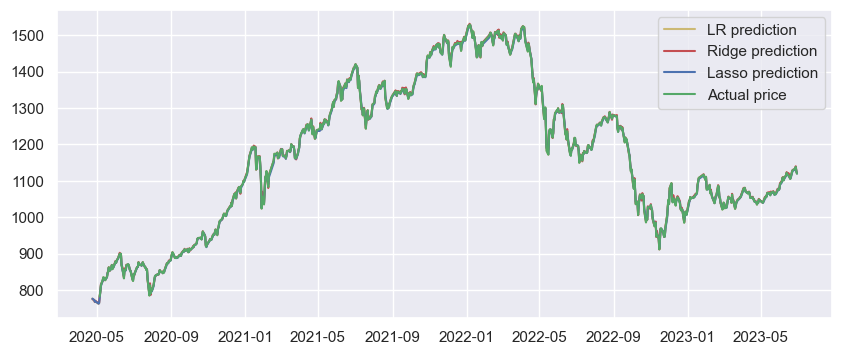

In [86]:
# Plot the visualization
actual = data['Close'].iloc[-791:]

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(lr_pred, color = 'y', label = 'LR prediction')
ax.plot(ridge_pred, color = 'r', label = 'Ridge prediction')
ax.plot(lasso_pred, color = 'b', label = 'Lasso prediction')
ax.plot(actual, color = 'g', label = 'Actual price')
ax.legend()
plt.show()

The model predicts very well and it seems like global stock indices are not outperformed the predictions of normal technical indicators. Let's take a closer look at shorter timeframe

In [87]:
# Define start and end period
import datetime
start = datetime.datetime(2023,1,1)
end = datetime.datetime(2023,6,30)

# Slicing the frame
actual_slice = actual.loc[start:end]
lr_pred_slice = lr_pred.loc[start:end]
ridge_pred_slice = ridge_pred.loc[start:end]
lasso_pred_slice = lasso_pred.loc[start:end]

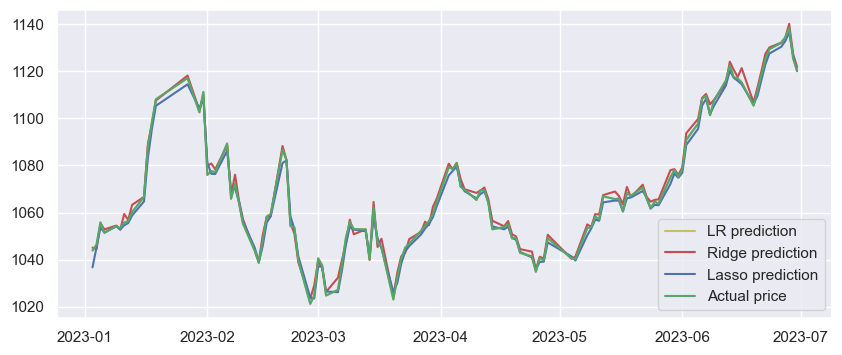

In [89]:
# Plot the visualization
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(lr_pred_slice, color = 'y', label = 'LR prediction')
ax.plot(ridge_pred_slice, color = 'r', label = 'Ridge prediction')
ax.plot(lasso_pred_slice, color = 'b', label = 'Lasso prediction')
ax.plot(actual_slice, color = 'g', label = 'Actual price')
ax.legend()
plt.show()

The Technical indicators fit well with the actual price movements and has low error.